In [1]:
%matplotlib inline
import scipy.io as sio
import random
import numpy as np
import scipy.misc as smp
import cv2
import matplotlib.pyplot as plt
import math
from scipy.optimize import fmin_cg
import matplotlib.mlab as mlab

## 1.1 Gaussian Distribution

In [2]:
a = sio.loadmat('ex8data1.mat')
#print a

X = a['X']

Xval = a['Xval']
yval = a['yval']
print "%i examples, %i dimensions " % (X.shape[0],X.shape[1])

307 examples, 2 dimensions 


In [3]:
def plotData():
    plt.figure(figsize=(8,5))
    plt.plot(X[:,0],X[:,1],'bx',ms=5)
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")

In [4]:
def estimateGauss(X):
    m = X.shape[0]
  
    mean_v = [ float(sum(X[:,i]))/m for i in xrange(X.shape[1])]
    sigsq_v = [ float(sum(pow(X[:,i]-mean_v[i],2)))/m for i in xrange(X.shape[1])]

    return mean_v, sigsq_v    

In [5]:
mean_v, sigsq_v = estimateGauss(X)
print mean_v, sigsq_v

[14.1122257839456, 14.99771050813621] [1.8326314134945172, 1.7097453308287784]


In [6]:
def drawContours(mean_v,sig_v):
 
    x1 = np.linspace(0, 30, 35)
    x2 = np.linspace(0, 30, 35)
    
    X1, X2 = np.meshgrid(x1, x2)
    Z = mlab.bivariate_normal(X1, X2, sig_v[0], sig_v[1],\
                              mean_v[0], mean_v[1])
  
    levels = [10**p for p in range(-14,0,2)]
    colors = ['g' for i in levels]
    colors[-1] = 'r'
  
    CS = plt.contour(X1, X2, Z, levels, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)

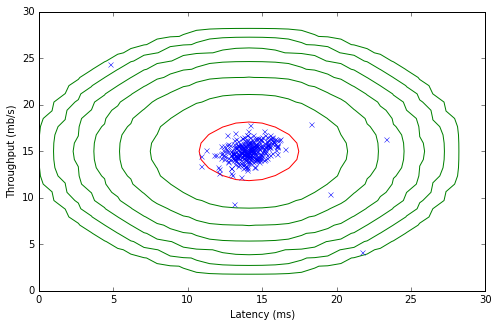

In [7]:
plotData()
drawContours(mean_v,sigsq_v)

In [8]:
def gaus(X, mean_v, sigsq_v):

    norm = 1.
    e = 1.
    
    for i in xrange(X.shape[0]):
        norm *= 1./math.sqrt(2 * np.pi * sigsq_v[i])
        e *= np.exp(-0.5*np.dot((X[i] - mean_v[i]).T,X[i] - mean_v[i]) / 2 / sigsq_v[i])

    return norm * e

In [9]:
def computeF1(pred_v, true_v):
    
    truepos = sum(pred_v & true_v)
    
    falsepos = sum([1 for i in pred_v if pred_v[i] == 1 and true_v[i] == 0])
    falseneg = sum([1 for i in pred_v if pred_v[i] == 0 and true_v[i] == 1])
 
    if (truepos + falsepos == 0) or (truepos + falseneg == 0):
        return 0
    
    prec = truepos / (truepos + falsepos)
    rec  = truepos / (truepos + falseneg)

    if (prec + rec) != 0:
        return 2*prec*rec/(prec + rec)
    else:
        return 0    

In [10]:
def selectThreshold(yval, pval):
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0

    ep_its = np.linspace(min(pval),max(pval),1000)
    
    for epsilon in ep_its:
        pred_v = pval < epsilon
        pred_v = pred_v.reshape([yval.shape[0],1])
        F1 = computeF1(pred_v, yval) 
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon

    return bestF1, bestEpsilon

In [11]:
prob_v = []

for x in Xval:
    prob = gaus(x,mean_v,sigsq_v)
    prob_v.append(prob)

prob_v = np.array(prob_v)
F1, epsilon = selectThreshold(yval,prob_v)
            
print "Best F1 is %0.2f, best eps is %0.2g"%(F1,epsilon)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 307 but corresponding boolean dimension is 1
/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 307 but corresponding boolean dimension is 1


Best F1 is 1.00, best eps is 9e-05


In [43]:
bad_x = []

for x in X:
    prob = gaus(x,mean_v,sigsq_v)
    if prob < epsilon:
        bad_x.append(x)

bad_x = np.array(bad_x)

plotData()
drawContours(mean_v,sigsq_v)
plt.plot(bad_x[:,0],bad_x[:,1],'o',ms=10,mec='r',mfc='None')

# Here, I take another look at finding outliers in a linear data set :
# https://github.com/ahack379/Quizzical/blob/master/Exp2_CrimeRates/crimeRates.ipynb

IndexError: list index out of range

In [13]:
# Now redo for higher dimensional set
b = sio.loadmat( 'ex8data2.mat' )
X_b = b['X']
yval_b = b['yval']
Xval_b = b['Xval']

In [14]:
mean_bv, sigsq_bv = estimateGauss(X_b)

prob_bv = []

for x in Xval_b:
    prob = gaus(x,mean_bv,sigsq_bv)
    prob_bv.append(prob)

prob_bv = np.array(prob_bv)
F1, epsilon = selectThreshold(yval_b,prob_bv)
print "test"


print "Epsilon I calculate is: ", epsilon

epsilon = 9*10**-17

anoms = [1 for x in X_b if gaus(x,mean_bv,sigsq_bv) < epsilon]
print "...seems I need an epsion of ", epsilon," to find ", len(anoms), "anomalies."

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 1
/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 1


test
Epsilon I calculate is:  2.86727758654e-18
...seems I need an epsion of  9e-17  to find  117 anomalies.


## 2. RECOMMENDER SYSTEMS

In [15]:
# Now redo for higher dimensional set
c = sio.loadmat( 'ex8_movies.mat' )
Y = c['Y']
R = c['R']

d = sio.loadmat( 'ex8_movieParams.mat')
f = int(d['num_features'])
u = int(d['num_users'])
m = int(d['num_movies'])
X = d['X']
Theta = d['Theta']

In [16]:
ratings = [ Y[0][i] for i in xrange(Y.shape[1]) if Y[0][i] != 0 ]

print "Average rating for Toy Story: %.2f " % np.mean(ratings)

Average rating for Toy Story: 3.88 


In [17]:
def grad(x_theta, y, R, u, lam=0.):
    
    x = x_theta[:m*f].reshape((m,f))
    theta = x_theta[m*f:].reshape((u,f))
    
    h = np.dot(x,theta.T)
    h_R = np.multiply(h,R) - y
   
    x_grad = h_R.dot(theta) + lam * x
    theta_grad = h_R.T.dot(x) + lam * theta
    
    X_flat = x_grad.reshape([-1,1])
    Theta_flat = theta_grad.reshape([-1,1])
    X_Theta_flat = np.concatenate((X_flat,Theta_flat))
  
    return X_Theta_flat.reshape(len(X_Theta_flat),)
    

# Recall from hmwk 4 that the minimizers need flattened info passed through
def cost(x_theta, y, R, u, lam = 0.):
    
    x = x_theta[:m*f].reshape((m,f))
    theta = x_theta[m*f:].reshape((u,f))
    
    h = np.dot(x,theta.T)
    h_R = np.multiply(h,R) - y

    # Only take into account rated movies (mult with R) + Regul
    cost = 0.5 * np.sum( pow(h_R,2) )\
        + (lam/2.) *( np.sum(np.square(theta)) + np.sum(np.square(x))) 
   
    return float(cost) 

In [18]:
X_flat = X.reshape([-1,1])
Theta_flat = Theta.reshape([-1,1])
X_Theta = np.concatenate((X_flat,Theta_flat))

In [19]:
c = cost(X_Theta,Y,R,u,0)
c1 = cost(X_Theta,Y,R,u,1.5)
print "Cost : %.2f " % float(c)
print "Cost : %.2f " % float(c1)
# My values are off
# However, after finally moving on to test my numerical +
# gradient implementations, it looks like the agreement is
# spot on. So I'm unsure why the costs themselves are so high

Cost : 27918.64 
Cost : 34821.70 


In [20]:
# Just like the previous homework, compare 
# numerical and gradient implementation
def checkCostFunction(x_theta, y, R, lam = 0.):
    
    perturb = np.zeros([len(x_theta),1])
    grad_comp = grad(x_theta,y,R,u,lam)
    e = 1e-4
    
    for i in xrange(5):
        
        it = int(np.random.rand()*len(x_theta))
        perturb[it] = e
        loss1 = cost(x_theta - perturb,y,R,u,lam)
        loss2 = cost(x_theta + perturb,y,R,u,lam)
        gradient = (loss2 - loss1) / (2*e)
        perturb[it] = 0
        
        print 'Num + comp grads: %0.10f  %0.10f ' % (gradient , grad_comp[it])

In [21]:
print "Do gradients match for lambda = 0?"
checkCostFunction(X_Theta,Y,R)

print "\nDo gradients match for lambda = 1.5?"
checkCostFunction(X_Theta,Y,R,lam=1.5)

Do gradients match for lambda = 0?
Num + comp grads: -0.5130996760  -0.5130996663 
Num + comp grads: -3.6945885404  -3.6945885497 
Num + comp grads: -4.1015116403  -4.1015116276 
Num + comp grads: 3.0495233841  3.0495233961 
Num + comp grads: 1.6037797104  1.6037797007 

Do gradients match for lambda = 1.5?
Num + comp grads: -1.8049523351  -1.8049523587 
Num + comp grads: -1.8998041924  -1.8998041567 
Num + comp grads: 0.3811453644  0.3811453578 
Num + comp grads: -2.7918018895  -2.7918019231 
Num + comp grads: -1.3153757391  -1.3153757486 


In [38]:
#Look through movie_id.txt and add scores for the original ratings in
#the homework set -- these are for some artificial user
orig_ratings = np.zeros((m,1))
orig_ratings[0]   = 4
orig_ratings[6]   = 3
orig_ratings[11]  = 5
orig_ratings[53]  = 4
orig_ratings[63]  = 5
orig_ratings[65]  = 3
orig_ratings[68]  = 5
orig_ratings[97]  = 2
orig_ratings[182] = 4
orig_ratings[225] = 5
orig_ratings[354] = 5

# Now let's look through the list and try to rate kid movies really high
# and see what it suggests.  Hopefully not Shawshank Redemption.
# orig_ratings[0] = 5
# orig_ratings[7] = 5
# orig_ratings[70]  = 5
# orig_ratings[94]  = 5
# orig_ratings[102]  = 4
# orig_ratings[260]  = 5
# orig_ratings[421]  = 5
# orig_ratings[537]  = 5
# orig_ratings[541]  = 5

Y_new = np.concatenate((Y,orig_ratings),axis=1)
R_new = np.concatenate((R,orig_ratings > 0),axis=1)

In [39]:
# Get some initial params going
X_rand = np.random.rand(m,f)
Theta_rand = np.random.rand(u+1,f)
X_Theta_rand = np.concatenate((X_rand.reshape([-1,1]),\
                               Theta_rand.reshape([-1,1])))

# ex8_cofi.m uses lambda = 10
result = fmin_cg(cost, x0=X_Theta_rand,fprime=grad, \
                 args=(Y_new,R_new,u+1,10.),\
                 maxiter=100,disp=True) 

# Just like in homework 4, had some trouble getting dimensionality
# right-- looking through the source code for fmin_cg helped :
# https://github.com/scipy/scipy/blob/master/scipy/optimize/optimize.py

         Current function value: 72064.768290
         Iterations: 100
         Function evaluations: 143
         Gradient evaluations: 143


In [40]:
# Find the mean ratings of movies -- as mentioned in lecture videos, this is 
# important especially for users who have not rated any movies
def getMeans(Y, R):
    return np.sum(Y,axis=1).astype(float) / np.sum(R,axis=1)

In [41]:
opt_x = result[:m*f].reshape((m,f))
opt_theta = result[m*f:].reshape((u+1,f))
    
recommend = opt_x.dot(opt_theta.T)

#Get recommendations for the most recent user (US!)
user_recommend = recommend[:,-1]
user_rec_mean_adj = user_recommend + getMeans(Y,R).flatten()

ordered_ixs = np.argsort(user_rec_mean_adj)[::-1]

movie_file = open('movie_ids.txt')
movies = [ ' '.join(line.split(' ')[1:-1]) for line in movie_file ]

temp_movies = [ movies[i] for i in xrange(len(orig_ratings)) \
               if orig_ratings[i] > 0 ]

In [42]:
print "Top movies recommended for the new user: "
for i in xrange(10):
    print 'Rating %0.1f for movie %s' % \
    (user_rec_mean_adj[ordered_ixs[i]],movies[ordered_ixs[i]])

Top movies recommended for the new user: 
Rating 8.5 for movie Titanic
Rating 8.5 for movie Star Wars
Rating 8.4 for movie Shawshank Redemption, The
Rating 8.3 for movie Raiders of the Lost Ark
Rating 8.2 for movie Schindler's List
Rating 8.2 for movie Good Will Hunting
Rating 8.1 for movie Wrong Trousers, The
Rating 8.0 for movie Usual Suspects, The
Rating 8.0 for movie Empire Strikes Back, The
Rating 8.0 for movie Braveheart
